In [0]:
from keras.datasets import mnist
import numpy as np

(x_tr, _), (x_te, _) = mnist.load_data()


In [0]:
x_train = x_tr.astype('float32') / 255.
x_test = x_te.astype('float32') / 255.
# flatten data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

# add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print (x_train_noisy.shape)
print (x_test_noisy.shape)

(60000, 784)
(10000, 784)
(60000, 784)
(10000, 784)


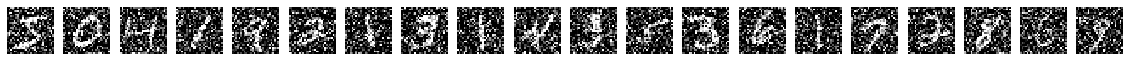

In [0]:
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [0]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32 

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)


encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[2]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

print('*'*20,"AUTO ENCODER STRUCTURE",'*'*20)
autoencoder.summary()

print('*'*20,"ENCODER STRUCTURE",'*'*20)
encoder.summary()

print('*'*20,"DECODER STRUCTURE",'*'*20)
decoder.summary()

******************** AUTO ENCODER STRUCTURE ********************
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_199 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_200 (Dense)            (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
******************** ENCODER STRUCTURE ********************
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_199 (De

In [0]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,
                batch_size=128,
#                 shuffle=True,
                validation_data=(x_test,x_test)
           )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1323 - val_loss: 0.3109
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1321 - val_loss: 0.3068
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1318 - val_loss: 0.3068
Epoch 4/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1316 - val_loss: 0.3037
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1314 - val_loss: 0.3029
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1312 - val_loss: 0.3001
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1310 - val_loss: 0.2980
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1309 - val_loss: 0.2990
Epoch 9/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1307 - val_loss: 0.2953
Epoch

In [0]:
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

******************** ORIGNAL ********************


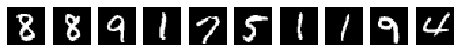

******************** Noisy ********************


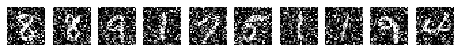

******************** RECONSTRUCTION ********************


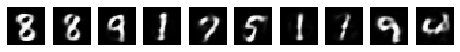

In [0]:
from random import randint
n=10
ran=[]

print("*"*20,'ORIGNAL','*'*20)
for i in range(n):
  a1 = plt.subplot(1,n, i+1)
  r=randint(0,10000)
  global ran
  ran.append(r)
  p=plt.imshow(x_test[r].reshape(28,28))
  a1.get_xaxis().set_visible(False)
  a1.get_yaxis().set_visible(False)
plt.show()

print("*"*20,'NOISY','*'*20)
for i in range(n):
  a1 = plt.subplot(1,n, i+1)
  p=plt.imshow(x_test_noisy[ran[i]].reshape(28,28))
  a1.get_xaxis().set_visible(False)
  a1.get_yaxis().set_visible(False)
plt.show()

print("*"*20,'RECONSTRUCTION','*'*20)
for i in range(n):
  a1 = plt.subplot(1,n, i+1)
  p=plt.imshow(decoded_imgs[ran[i]].reshape(28,28))
  a1.get_xaxis().set_visible(False)
  a1.get_yaxis().set_visible(False)
plt.show()